# **Rapport PIAE - Analyse de son**
## Tom GERMAIN, Hugo LE CARDINAL, Andrea ZANCHETTA

## **Sommaire**  
1) Introduction

    1.1) Caractéristique du son

2) Méthodes + Résultats

    2.1) Caractéristique du son.
    Protocole + type de capteur utilisé. 

    -   2.1.1) Étude de l'enveloppe guitare et piano 

        2.1.2) Étude du spectre de la guitare et piano 

        2.1.3) Comparaison avec modèle numérique 

    2.2) Étude de l'harmonicité d'un accord  

    -   2.2.1) Première approche : à partir des notes séparées  

        2.2.2) A partir d'un accord unique 
3) Discussion

- Analyse du système étudié :  
  - Identifier les principaux phénomènes physiques mis en jeu lors de la génération d’un 
son. 
  - Identifier des principales des quantités en acoustique. 
- Mise en place d’un modèle : 
  - Mettre  en  place  un  modèle  numérique  (python,  adams,  solidworks,  autres...) 
permettant  de  modéliser  la génération et la perception d’un son,  et  identifier  les 
hypothèses de simplification. 
- Proposer et mettre en place un protocole expérimental : 
  - Identifier les points de comparaison possibles par rapport au modèle mis en place 
  - Identifier les capteurs nécessaires, la chaîne d’acquisition correspondante 
  - Evaluer les incertitudes liées aux mesures expérimentales. 
- Exploiter les acquisitions : 
  - Définir  un  post-traitement rigoureux permettant d’extraire des signaux les données 
pertinentes pour la corrélation modèle/expérimentation. 
  - Exploiter  les  données  pour  recaler  le  ou  les  modèles  numériques  permettant  de 
reproduire le comportement observé en agissant sur les caractéristiques du système.

## Introduction

*Généralement, lorsqu'un instrument de musique est joué, le son n'apparaît pas immédiatement après l'action. Inversement, le son disparaît progressivement après qu'un niveau a été maintenu pendant un certain temps (voir la figure x sur l'annonce de l'enveloppe). Le processus de changement d'amplitude dans le temps est appelé « enveloppe » et est classé en quatre parties : l'attaque, la décroissance, le maintien et le relâchement. L'attaque représente le processus de montée pour atteindre l'amplitude maximale après la génération du son. Le processus d'intensité maximale jusqu'à l'état de maintien est appelé décroissance. Le maintien est le moment où le son conserve plus ou moins son volume et le processus de disparition du son est appelé relâchement.
L'attaque est le facteur le plus influent sur la clarté parmi les 4 autres parties. Le relâchement est un facteur important dans la perception de la réverbération de l'instrument. L'attaque a également la plus grande influence sur la sonorité de l'instrument. Le violon et la harpe sont des instruments typiques avec un long relâchement dans son enve-lope tandis que l'attaque rapide est caractérisée par des instruments tels que le piano, la batterie et le xylophone (instruments percussifs).*

## 2 Méthodes et Résultats

### 2.1 Caractéristique du son
Pour la suite de notre expérimentation, nous avons besoin de prendre des mesures du son.

Nous avons donc installé un capteur spécialisé pour l’enregistrement audio à proximité des cordes du piano, dans le but de capter au mieux le son émis par l’instrument tout en minimisant l'influence des bruits ambiants ou parasites provenant de l’environnement extérieur. Ce positionnement permet de prioriser le signal acoustique propre au piano, notamment lors des frappes sur les touches, afin d’obtenir des données précises et exploitables.

Le capteur nous fournit des mesures temporelles de l’amplitude du signal sonore, ce qui nous permet d’analyser l’évolution de l’intensité du son au cours du temps. Ces données sont essentielles pour l’étude des caractéristiques acoustiques du piano et pour toute modélisation ou traitement ultérieur du signal.

### 2.1.1 Étude de l'enveloppe guitare et piano

1. Pour caractériser notre son sous un enveloppe segmenté, nous allons d’abord faire un contour autour de l’amplitude du signal à chaque pas de temps, nous faisons l’absolue afin d’obtenir l’enveloppe supé-rieur du signal.
 
2. Nous identifions 5 points ce qui fait 4 segments. Le premier point marque le début de la génération du son. Le deuxième marque l’amplitude maximale de cette génération de son. Le troisième point signifie le changement de pente dans la chute de l’amplitude de ce son. Et puis, le quatrième identifie le moment où on arrête de générer le son, et le dernier point marque l’extinction complet du son.

Nous avons donc analyser les caracteristuque des enveloppes de la guitare et du piano.

<div class="alert alert-block alert-info">
Il s'agit d'une analyse qualitative.<br>
Nous avons limité l'analyse au même registre afin de limiter les nombreux factor de notre mesures
Il faut qu'on joue de façon similaire.<br>
C'est-à-dire que l'amplitude max de notre enregistrement doit être similaire (une différence d'environ 5%) qui réflet une note joué de même 'intensité'.
</div>

In [325]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [326]:
def prepare_audio(file_name, start_time, end_time, sr):
    y, sr = librosa.load(file_name, sr=sr, offset=start_time, duration=end_time-start_time)
    #y = y[round(sr*start_time):round(sr*end_time)]
    x = np.arange(start_time*sr, end_time*sr)
    return y, x

def compute_envelope(y, sr, win_len_sec=0.1):
    """Computation of a signal's envelopes
    Args:
        y (np.ndarray): Signal (waveform) to be analyzed
        win_len_sec (float): Length (seconds) of the window (Default value = 0.01)
        sr (scalar): Sampling rate (Default value = 22050)

    Returns:
        env (np.ndarray): Magnitude envelope
    """
    win_len_half = round(win_len_sec * sr * 0.5)
    N = y.shape[0]
    env = np.zeros(N)
    for i in range(N):
        i_start = max(0, i - win_len_half)
        i_end = min(N, i + win_len_half)
        env[i] = np.amax(np.abs(y)[i_start:i_end])
    return env

def norm_adsr(arr):
    arr1 = arr.copy()
    arr1[:,0] = arr1[:,0]-arr1[0,0] # relative to 0
    arr1[:,1] = arr1[:,1]/arr1[1,1] # normal the max value to 1
    return arr1

def norm_env(arr):
    """Normalize envelope data.
    Args:
        x_env_tuple: (x_values, envelope_values)
    Returns:
        (normalized_x, normalized_envelope)
    """
    x, env = np.array(arr).copy()
    
    # Normalize envelope to [0,1] range
    if len(env) > 0:
        env_norm = env / np.max(env)
    else:
        env_norm = env.copy()
        
    return x, env_norm

D'abord, nous prenons la partie d'audio qu'il nous convient en faisant un 'trim'

In [327]:
# pour la guitare

# sampling rate
sr = 4410

# E2
y_guitar, x_guitar = prepare_audio("Audio/GuitarAplucklength.wav", 11.4, 14.2, sr) 

In [328]:
env_guitar = compute_envelope(y_guitar, sr)

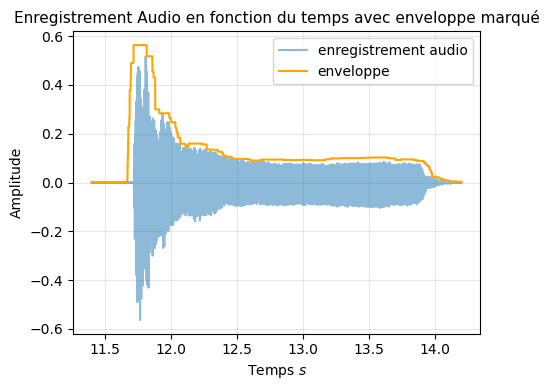

In [329]:
def plot_enveloppe_et_audio(enveloppe, audio):
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    ax.plot(audio[0]/sr, audio[1], alpha=0.5, label="enregistrement audio")
    ax.plot(audio[0]/sr, enveloppe, 'orange', label="enveloppe")
    ax.set_title("Enregistrement Audio en fonction du temps avec enveloppe marqué",  fontsize=11)
    ax.set_xlabel(r"Temps $s$", fontsize=10)
    ax.set_ylabel("Amplitude", fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()

plot_enveloppe_et_audio(env_guitar, (x_guitar, y_guitar))

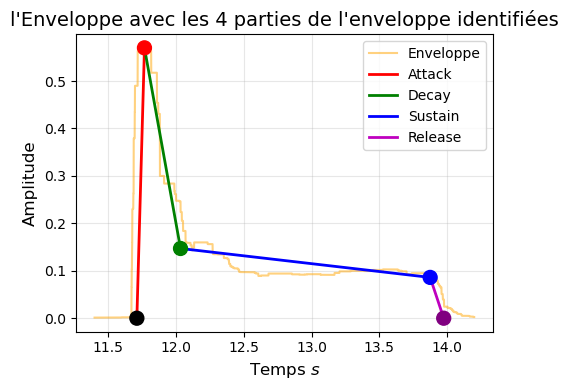

In [330]:
# adsr de la note E2 de la guitare
adsr_guitar = np.array([[11.712, 0], [11.768, 0.57], [12.034, 0.147], [13.875, 0.086], [13.975, 0]])

def plot_adsr(liste_adsr, audio):
    # Create figure
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    # Plot the envelope
    ax.plot(audio[0]/sr, audio[1], 'orange', alpha=0.5, label='Enveloppe')
    # Plot ADSR stages with different colors
    # Attack (from start to peak)
    ax.plot(liste_adsr[0:2,0], liste_adsr[0:2,1], 'r-', linewidth=2, label='Attack')
    # Decay (from peak to sustain level)
    ax.plot(liste_adsr[1:3,0], liste_adsr[1:3,1], 'g-', linewidth=2, label='Decay')
    # Sustain (constant level)
    ax.plot(liste_adsr[2:4,0], liste_adsr[2:4,1], 'b-', linewidth=2, label='Sustain')
    # Release (from sustain to zero)
    ax.plot(liste_adsr[3:5,0], liste_adsr[3:5,1], 'm-', linewidth=2, label='Release')
    # Mark the key points
    ax.scatter(liste_adsr[:,0], liste_adsr[:,1], c=['black', 'red', 'green', 'blue', 'purple'], s=100, zorder=5)
    # Add labels and title
    ax.set_title("l'Enveloppe avec les 4 parties de l'enveloppe identifiées", fontsize=14)
    ax.set_xlabel(r"Temps $s$", fontsize=12)
    ax.set_ylabel("Amplitude", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_adsr(adsr_guitar, (x_guitar, env_guitar))


In [331]:
# POUR VÉRIFIER LA FIABILITÉ

# E2 (deuxième éssai)
y_guitar2, x_guitar2 = prepare_audio("Audio/GuitarAplucklength.wav", 15, 19.5, sr)

# middle of bridge E2 pour voir les differences des conditions initiales à nous intérroger
y_guitar2_mid, x_guitar2_mid = prepare_audio("Audio/GuitarAplucklength.wav", 30.5, 34.4, sr) 

# juste pour les spectres
# low
y_guitar_low, x_guitar_low = prepare_audio("Audio/Guitar.wav", 11.3, 16, sr) 
# mid
y_guitar_mid, x_guitar_mid = prepare_audio("Audio/Guitar.wav", 17.4, 23, sr)
# high
y_guitar_high, x_guitar_high = prepare_audio("Audio/Guitar.wav", 31, 36, sr) 


adsr_guitar2 = np.array([[15.05, 0], [15.106, 0.566], [15.418, 0.123], [19.352, 0.044], [19.471, 0]])

#norm_adsr(adsr_guitar)
#norm_adsr(adsr_guitar2)

# figure 3 - avec courbe simplifie de l'enveloppe
# fig, ax = plt.subplots(1,1, figsize=(5,4))
# ax.set_title("Enveloppes de la note E2 sur la guitare", fontsize=14)
# ax.set_xlabel(r"Temps $s$", fontsize=12)
# ax.set_ylabel("Amplitude", fontsize=12)
# ax.plot(adsr_guitar2[:,0], adsr_guitar2[:,1], 'r-', label="note E2")
# ax.plot(adsr_guitar[:,0], adsr_guitar[:,1], 'b-', label="note E2 (2ème essai)")

# ax.legend(fontsize=10)
# ax.grid(True, alpha=0.3)
#plt.tight_layout()

En comparant avec le F4 du piano

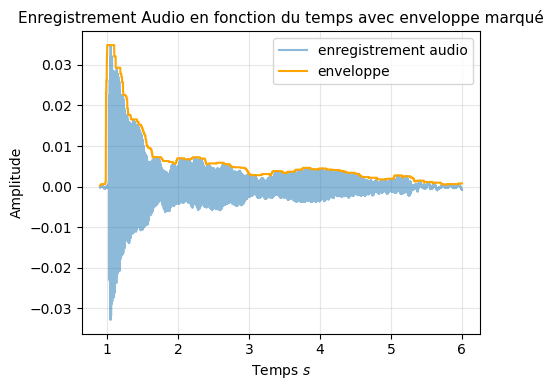

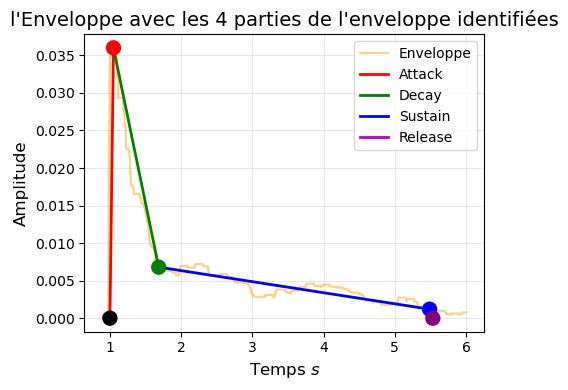

In [332]:
y_piano_f4, x_piano_f4 = prepare_audio("Audio_HD/F4.wav", 0.9, 6, sr=sr)
env_piano_f4 = compute_envelope(y_piano_f4, sr=sr)

plot_enveloppe_et_audio(env_piano_f4, (x_piano_f4, y_piano_f4))

# on note certains points distinctes
adsr_piano_f4 = np.array([[1.00226757e+00, 0.00000000e+00], [1.05215420e+00, 3.60000000e-02], [1.68707483e+00, 6.80000000e-03], [5.48752834e+00, 1.20000000e-03], [5.53287982e+00, 0.00000000e+00]])

plot_adsr(adsr_piano_f4, (x_piano_f4, env_piano_f4))

In [338]:
def plot_difference_adsr(arrs):
    """
    Args:
        arrs (list): [arr1, arr2]
        where each arr = [adsr, (x_values, envelope_values)]
    """
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    
    for arr in arrs:
        adsr_norm = norm_adsr(arr[0])
        #x_norm, env_norm = norm_env(arr[1])  # This should return (x, env)
        
        #ax.plot(x_norm/sr, env_norm, 'orange', label="Envelope")
        ax.plot(adsr_norm[:, 0], adsr_norm[:, 1])
    
    ax.set_title("Audio Recording with Envelope and ADSR", fontsize=11)
    ax.set_xlabel(r"Time $s$", fontsize=10)
    ax.set_ylabel("Amplitude", fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


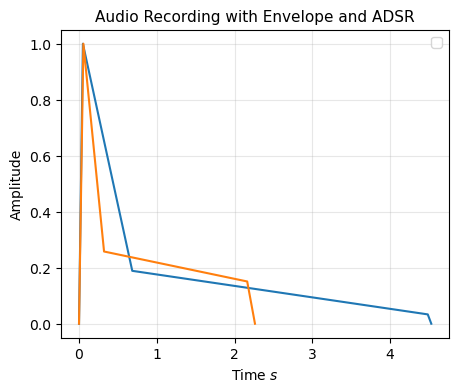

In [339]:
arr_piano = [adsr_piano_f4, (x_piano_f4, env_piano_f4)]
arr_guitare = [adsr_guitar, (x_guitar, env_guitar)]
#arr_guitare2 = [adsr_guitar2, (x_guitar2, env_guitar)]

arrs = [arr_piano, arr_guitare]
plot_difference_adsr(arrs)
    

Resultats : Les enveloppes sonores présentent des caractéristiques assez similaires. Sur la figure générée, la courbe bleue correspond à l’enveloppe du piano, tandis que la courbe orange représente celle de la guitare. On observe que les deux sons atteignent leur amplitude maximale en un temps très proche. La principale différence réside dans la phase de décroissance (decay), qui varie d’un instrument à l’autre.

Discussion : on constate que nous avons pu faire 2 éssai enrègistrement avec un amplitude maximal similaire.
temps d'attack plus petit que le piano parceque pour le guitar, on tire la corde et le son est crée à partir du moment où on lache. 
Tandis que le piano frappe la corde avec le marteau et donc pour un temps plus longue, reste sur la corde.

Au final on trouve pas une distinction forte, car ils sont des insturments a cordes qui fonctionne de maniere tres similaires. 
Alors, en comparant avec une son d'un instrument a vent (le alto saxophone) (lien youtube...), on trouve une enveloppe très differente.
(figure)

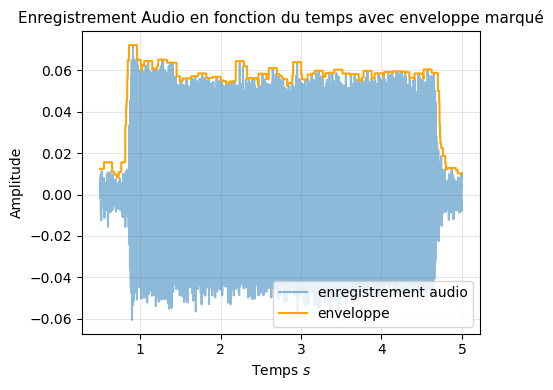

In [335]:
sr = 44100
y_sax_e2, x_sax_e2 = prepare_audio("Audio/sax.wav", 0.5, 5, sr) 

env_sax_e2 = compute_envelope(y_sax_e2, sr)

plot_enveloppe_et_audio(env_sax_e2, (x_sax_e2, y_sax_e2))

Ici, se degagent clairement une enveloppe totalement different, caractérisé par un attack et un decay très petit. est tant que le personne souffle dans l'instrument pour generer le son, le son reste dans un etat de sustain. Ils sont different`a cause des phenomenes different ou on donne toujours d'energie de vibration mais lorsqu'il n'ya plus il ne peux plus faire du son. Par contre la corde s'agit d';une force à un instant mais il continue a oscillé parceque l'energie est stoqué dans la corde. 

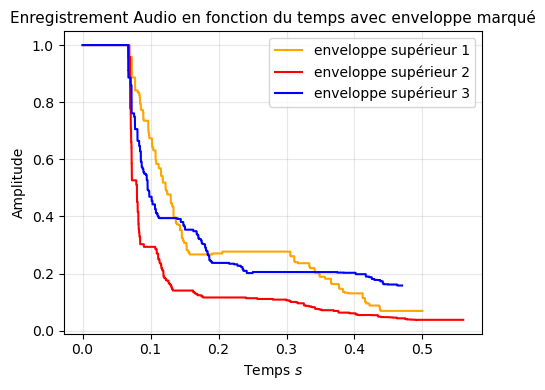

In [336]:
# est-ce que la hauteur de la note guitare influe l'enveloppe ?

def process_adsr_norm(arr, arrt):
    arrt = arrt[:len(arr)]  # Force equal length
    arrt = arrt-arrt[0] # relative to 0
    
    arr = arr/np.max(arr) # normal the max value to 1
    return arr, arrt

arr_high = process_adsr_norm(compute_envelope(y_guitar_high, sr), x_guitar_high)
arr_mid = process_adsr_norm(compute_envelope(y_guitar_mid, sr), x_guitar_mid)
arr_low = process_adsr_norm(compute_envelope(y_guitar_low, sr), x_guitar_low)

# Create figure
fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.plot(arr_high[1]/sr, arr_high[0], 'orange', label="enveloppe supérieur 1")
ax.plot(arr_mid[1]/sr, arr_mid[0], 'red', label="enveloppe supérieur 2")
ax.plot(arr_low[1]/sr, arr_low[0], 'blue', label="enveloppe supérieur 3")
ax.set_title("Enregistrement Audio en fonction du temps avec enveloppe marqué",  fontsize=11)
ax.set_xlabel(r"Temps $s$", fontsize=10)
ax.set_ylabel("Amplitude", fontsize=10)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()

### BONUS : Influence du régistre sur le piano
A present nous n;avons considere qu'un note d'un cerrtrain frequence pour toutes les isntruments, mais en fait, il s'avere que les caraterisutque change en fonction du frequence joué, surtout dans le piano.

In [337]:
adsr_f4 = np.array([[2.21, 0], [2.32, 0.036], [3.72, 0.0068], [11.6, 0.0021], [11.8, 0]])
adsr_f4_2 = np.array([[21.4, 0], [21.5, 0.036], [23, 0.0064], [33.1, 0.0019], [33.7, 0]])
adsr_c2 = np.array([[3.89, 0], [4.06, 0.0624], [5.13, 0.0292], [21.5, 0.00276], [21.5, 0.00276]])
adsr_c6 = np.array([[4.14, 0], [4.45, 0.019], [5.24, 0.0016], [15.2, 0], [15.2, 0]])

process_adsr_norm(adsr_c2)
process_adsr_norm(adsr_c6)
process_adsr_norm(adsr_f4)
process_adsr_norm(adsr_f4_2)

# figure 3 - avec courbe simplifie de l'enveloppe
fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.plot(adsr_f4[:,0]/sr/10e-5, adsr_f4[:,1])
ax.set_title("Enveloppe normalisé des differents enregistrement audio", fontsize=14)
ax.set_xlabel(r"Temps $s$", fontsize=12)
ax.set_ylabel("Amplitude", fontsize=12)
plt.plot(adsr_c2[:,0]/sr/10e-5, adsr_c2[:,1], 'r-', label="note C2")
#ax.scatter(adsr_c2[:,0]/sr/10e-5, adsr_c2[:,1], c=['black', 'red', 'green', 'blue', 'purple'], s=100, zorder=5)
plt.plot(adsr_c6[:,0]/sr/10e-5, adsr_c6[:,1], 'g-', label="note C6")
plt.plot(adsr_f4[:,0]/sr/10e-5, adsr_f4[:,1], 'b-', label="note F4")
plt.plot(adsr_f4_2[:,0]/sr/10e-5, adsr_f4_2[:,1], 'm-', label="note F4 (2ème enregistrement)")

ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

TypeError: process_adsr_norm() missing 1 required positional argument: 'arrt'

Resultats:

discussion: Ces differents caractersitque sont a cause de plusierus facteurs:
- difference d'epaisseur de la corde. Guitare et piano mais piano la differnece et plus grande par rapport a sa longeueur qui va diminieur aussi plus que le note est eleve, mais la longeuere de la corde d'un guitar ne change pas.
- registre bas, la corde est tellement epaisse que le son change beaucoup avec un son plus metallique, ce qui fait que les marteaux sont couvert par une materielle doux pour 'damping the mettalic sound'
- aussi les instruuments sont concues non parceque pour faire aesthetic, mais les ingenier sont au courant des phenomenes present dans la generation du son et donc ils font expres de faire ressortir plus certain harmoniques pour que le son est plus sympa a entendre. Le corps d'un guitare est fait pour faire ressortir un certain mode de resonance quand on joue pourque un certain harmonique est plus audible.
- uhh

### 2.1.2 Étude du spectre de la guitare et piano

-  guitare
-  piano
-  bonus: influence de la note touché sur la caracteristique de son

In [ ]:
def plot_fourier(y, sr):
    N = len(y) # N is the signal length (number of samples)
    dt = 1/sr
    df= 1/((N-1)*dt) 
    frequencies = np.arange(0, sr/2, df)

    fft_result = np.fft.fft(y)

    # Take only positive frequencies
    half_idx = len(frequencies) // 2
    frequencies = frequencies[:half_idx]
    magnitude = np.abs(fft_result[:half_idx])

    return frequencies, magnitude

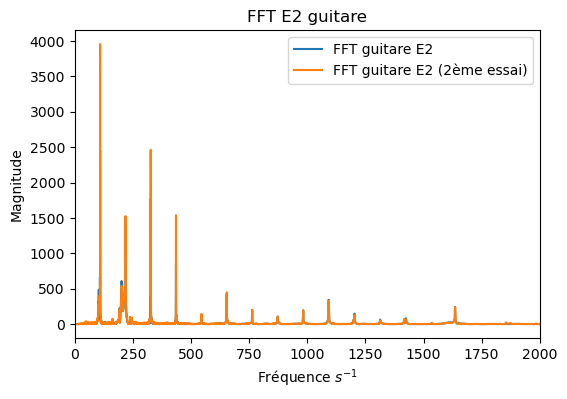

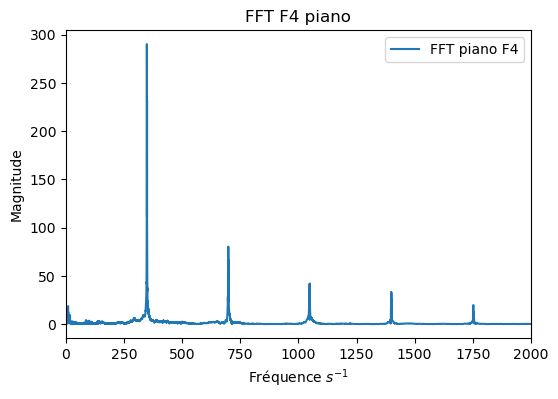

In [ ]:
# guitar
y_guitar_freq, y_guitar_mag = plot_fourier(y_guitar, 44100)
y_guitar2_freq, y_guitar2_mag = plot_fourier(y_guitar2, 44100)
# piano
y_f4_freq, y_f4_mag = plot_fourier(y_f4, 44100)

# Plot FFT with peaks marked
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(y_guitar_freq, y_guitar_mag, label="FFT guitare E2")
ax.plot(y_guitar2_freq, y_guitar2_mag, label="FFT guitare E2 (2ème essai)")
#ax.axvline(350, color="black", linestyle="dashed", alpha=0.5, label="Fréquence du note joué")
ax.set_title("FFT E2 guitare")
ax.set_xlabel(r"Fréquence $s^{-1}$")
ax.set_ylabel("Magnitude")
ax.set_xlim(0, 2000)  # Limit frequency range for better visualization
ax.legend()
plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(y_f4_freq, y_f4_mag, label="FFT piano F4")
#ax.axvline(350, color="black", linestyle="dashed", alpha=0.5, label="Fréquence du note joué")
ax.set_title("FFT F4 piano")
ax.set_xlabel(r"Fréquence $s^{-1}$")
ax.set_ylabel("Magnitude")
ax.set_xlim(0, 2000)  # Limit frequency range for better visualization
ax.legend()
plt.show()

# fig, ax = plt.subplots(1,1, figsize=(6,4))
# ax.plot(y_c6_freq, y_c6_mag, label="FFT c2")
# #ax.axvline(350, color="black", linestyle="dashed", alpha=0.5, label="Fréquence du note joué")
# ax.set_title("FFT c6")
# ax.set_xlabel(r"Fréquence $s^{-1}$")
# ax.set_ylabel("Magnitude")
# ax.set_xlim(0, 10000)  # Limit frequency range for better visualization
# ax.legend()
# plt.show()

***Notes:***<br>
-	lower register, strings are thicker and heavi-er and longer to allow lower frequency of vibration but thus string is more rigid and does not easily let higher frequency har-monics thus the overtones and harmonics all rest in the lower register. The string vi-brates longer in the lower register with a smaller decay. 
-	Lower register C2 produce much more overtones of closer magnitude even having the frequency played much smaller in am-plitude compared to its 2nd harmonic or 3rd harmonic. While C6 puts almost all its energy in the fundamental, leaving all its harmonics of very weak magnitude.
-	The piano soundboard is designed to effi-ciently project the mid-upper register thus leaving the lower register not quite project-ed well leaving a muddier sound.
-	Bass hammers are soft (in the lower regis-ter) to avoid harshness when struck on the thicker metallic string. A compromise that leads to a warmer tone like its middle and upper register however it reduces the clari-ty of the note (not exactly point contact on the string in our hypotheses)
-	In a guitar, this isn’t the case but the guitars body is like a piano which is more efficient in projecting mid and upper frequencies, but the strings thickness is negligible with respect to its length.
-	In terms of the envelope characteristics be-tween the guitar and the piano, the guitar decays faster when plucked and has a shorter sustain period because of it. How-ever, along the range of frequencies the guitar rests about the same in terms of waveshape, envelope characteristics and overtone magnitudes, while the piano var-ies greatly. Therefore, our hypothesis for the initial conditions of the 
hammers of a piano striking the strings are somewhat lacking in rigidity and applies cleaner to the guitar while the conditions must be reviewed and might vary depend-ing on the range on the keys.
-	The initial conditions of a guitar in fact must be reviewed as we commonly strike the guitar not in the middle but closer to the fix point of the guitar which affects the harmonics generated, thus we have studied this difference for different plucking posi-tion along one open string of the guitar.
-	After, it’s the study on the feeling of unison present in a group of notes played at once (i.e. a chord).


### 2.1.3 Modèle Numérique

ANDREA: when you follow the td of our teacher (michael perez) and when he disccuess the fourier coefficients of the fourier series of a piano, then guitar. After comparing the results with the model, say that the in the end the initial condition posed in the document (le cours) should be improved and perhaps changed. Fore example, with a guitar we commonly strike the guitar not in the middle but closer to the fix point of the guitar which affects the harmonics generated

## 2.2 Étude de l'harmonicité d'un accord

### 2.2.1 Première approche : à partir des notes séparées

-  multiplicité des spéctres

Préparer les enrègistrement audios

### 2.2.2 À partir d'un accord unique

-  analyse à partir des fondamentales

In [ ]:
freq_A1 = 27.5
notes = ['C', 'C#', 'D', 'D#', 'E', 'F',
        'F#', 'G', 'G#', 'A', 'A#', 'B']


def freq_to_note(freq):
    A_index = 9  # Position de A dans la liste des notes
    if freq <= 0:
        return None
    n_demi_tons = round(12 * np.log2(freq / freq_A1))
    note_index = (A_index + n_demi_tons) % 12
    octave = (A_index + n_demi_tons) // 12
    return notes[note_index] + str(octave)


def trouve_pics(audio, sr, tolerance_hz=5):
    amplitude = np.abs(np.fft.rfft(audio))
    freqs = np.fft.rfftfreq(len(audio), 1 / sr)
    
    freq_resolution = freqs[1]-freqs[0]
    min_distance = int(tolerance_hz/freq_resolution)
    
    i_peaks, _ = find_peaks(amplitude, height=15, distance=min_distance)
    freq_peaks = sorted(freqs[i_peaks])
    print(freq_peaks)
    
    return freq_peaks

[260.75, 329.25, 390.5, 522.75, 657.75, 783.75, 987.75, 1176.75, 1319.75, 1655.0, 2374.0]
Les spectres de chaque note présentent 3 fréquences communes : [782.25, 1303.75, 1564.5]


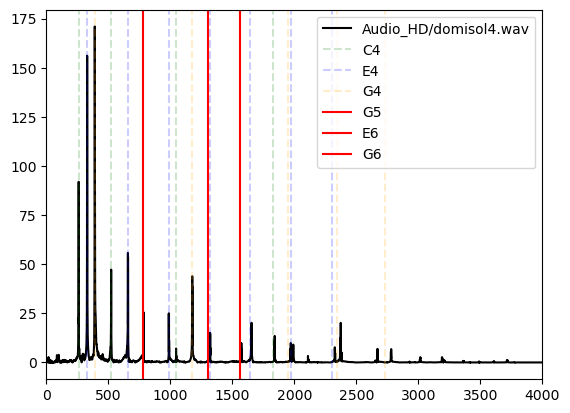

In [ ]:
# --- Imports des audios ---
fichier = "Audio_HD/domisol4.wav"
#nb_notes = int(input("Nombre de notes dans l'accord :"))
nb_notes = 3

audio, sr = librosa.load(fichier)
audio = audio[sr:5*sr]   # trim

# --- Transformée de Fourier ---
freqs = np.fft.rfftfreq(len(audio), 1 / sr)
spectre = np.abs(np.fft.rfft(audio))



# --- Détection fondamentales ---
freq_peaks = trouve_pics(audio, sr,tolerance_hz=5)
dico_accords = {}
noms_note = []
nb_harmoniques = 6

for i in range(nb_notes):
    fondamentale = freq_peaks[i]
    nom_note = freq_to_note(fondamentale)
    noms_note.append(nom_note)
    dico_accords[nom_note] = [fondamentale]
    for j in range(nb_harmoniques):
        dico_accords[nom_note].append(fondamentale*(j+2))

pics_en_commun = []

# Parcourir toutes les combinaisons de fréquences
for f1 in dico_accords[noms_note[0]]:
    note_f1 = freq_to_note(f1)
    count = 0
    for key, peaks in dico_accords.items():  # Pour chaque fichier dans le dictionnaire
        if key != noms_note[0]:  # Ignorer le 1er fichier car on l'a déjà parcouru
            for f2 in peaks:
                note_f2 = freq_to_note(f2)
                if note_f1 == note_f2 :
                    count += 1
                    break 
            if count >= 1:  # Si trouvé dans au moins un autre fichier
                break  # On peut sortir de la boucle des fichiers

    if count >= 1:  # Présence dans au moins 2 listes
        pics_en_commun.append(float(f1))



print("Les spectres de chaque note présentent", len(pics_en_commun), "fréquences communes :", pics_en_commun)



# --- Affichage ---
colors = ["green","blue","orange"]
fig, ax = plt.subplots()

# --- Spectre ---
ax.plot(freqs, spectre,label=fichier, color='black')

# --- Harmoniques ---
for i, (nom, accord) in enumerate(dico_accords.items()):
    color = colors[i]
    ax.axvline(x=accord[0], color=color, linestyle='--', alpha=0.2,label=nom)
    for freq in accord[1:] : 
        ax.axvline(x=freq, color=color, linestyle='--', alpha=0.2)

# --- Pics en commun ---        
for pic in pics_en_commun : 
    note = freq_to_note(pic)
    ax.axvline(x=pic, color='red', linestyle='-', alpha=1,label=note)

ax.set_xlim(0,4000)
ax.legend()
plt.show()
